# Задачи исследования:
1.   какой период у нас есть дата о платежах;
2.   сколько уникальных клиентов/категорий/методов оплаты/статусов есть;
3.   средний чек клиента;
4.   распределение по статусам — сколько заказов у нас отменено, сколько завершено, сколько возвращено;
5.   динамику продаж в виде таблицы и в виде графика;
6.   продажи по дням недели в виде графика;
7.   GMV по каждой категории, так как нужно узнать, какая категория товара приносит больше всего денег;
8.   долю отмен в каждой категории;
9.   на какие категории мы даем скидки;
10.   рейтинг самых продаваемых товаров.















# Выводы:
1.   данне охватывают пермод с 2021-07 по 2022-01-12
2.   Уникальных клиентов - 30874, уникальных категорий - 16, уникальных методов оплат - 10, уникальных статусов - -
3.   средний чек клиента - 2716 руб.;
4.   заказов в статусе "завершен" - 77810; в статусе "отменен" - 41190;
5.   пик продаж приходится на 2021-11-01 (98 078 888), ддалее было снижение 2021-12-01 (27 540 437);
6.   больше всего продаж приходится на четверг;
7.   Большая часть продаж (30%) приходится на категорию мобильные телефоны и планшеты; на втором - бытовая техника и мужская мода (14% и 9%); ;
8.   больше всего отмен в категория развлечения (60%);
9.   больше всего скидок даем на мобильные телефоны и планшеты, бытовую тезнику и развлечения;
10.   категория самого популярного товара - Традиционные подарки (1615 заказов)





## Загрузка данных

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('marketplace_dataframe.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34509 entries, 0 to 34508
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        34509 non-null  int64 
 1   ID товара                         34509 non-null  int64 
 2   Статус                            34509 non-null  object
 3   Дата создания                     34265 non-null  object
 4   Артикул товара                    34484 non-null  object
 5   Цена                              34509 non-null  int64 
 6   Количество заказов                34509 non-null  int64 
 7   Итоговая сумма                    34509 non-null  int64 
 8   ID транзакции                     34509 non-null  int64 
 9   Категория                         34508 non-null  object
 10  Сумма скидки                      34508 non-null  object
 11  Метод оплаты                      34310 non-null  object
 12  Дата оплаты       

In [7]:
df.describe()

,Unnamed: 0,ID товара,Цена,Количество заказов,Итоговая сумма,ID транзакции
count,34509.000000,34509.000000,34509.000000,34509.000000,3.450900e+04,3.450900e+04
mean,17254.000000,232475.742647,4016.065983,1.134197,5.326255e+03,1.001591e+08
std,9962.034556,12594.854458,11351.014055,1.146855,2.327643e+04,5.391967e+05
min,0.000000,211131.000000,0.000000,1.000000,0.000000e+00,1.001700e+04
25%,8627.000000,220884.000000,285.000000,1.000000,3.380000e+02,1.001546e+08
50%,17254.000000,232879.000000,535.000000,1.000000,7.990000e+02,1.001621e+08
75%,25881.000000,243664.000000,1600.000000,1.000000,2.727000e+03,1.001693e+08
max,34508.000000,253826.000000,235000.000000,130.000000,1.280473e+06,1.001767e+08


# Предобработка данных

In [50]:
df = df.drop(columns = ['Unnamed: 0'])# удалим дублирующий столбец
df = df.dropna()# избавимся от пропусков
df.duplicated().sum() #проверка на дубликаты
df['Дата оплаты'] = pd.to_datetime(df['Дата оплаты'], format='%d.%m.%Y', errors='coerce') # преобразуем столбцы к нужным нам типам данных - ТИПИЗАЦИЯ #типизация - это способ указания типа данных для переменных.

#  1. За какой период у нас есть дата о платежах

In [18]:
period = df['Дата оплаты'].min(), df['Дата оплаты'].max()
print(f"Период данных о платежах: {period}")

Период данных о платежах: (Timestamp('2021-07-01 00:00:00'), Timestamp('2021-09-30 00:00:00'))


# 2. Сколько уникальных клиентов/категорий/методов оплаты/статусов есть

In [19]:
unique_clients = df['ID клиента'].nunique()
unique_categories = df['Категория'].nunique()
unique_payment_methods = df['Метод оплаты'].nunique()
unique_statuses = df['Статус'].nunique()
print(f"Уникальных клиентов: {unique_clients}")
print(f"Уникальных категорий: {unique_categories}")
print(f"Уникальных методов оплаты: {unique_payment_methods}")
print(f"Уникальных статусов: {unique_statuses}")

Уникальных клиентов: 9919
Уникальных категорий: 16
Уникальных методов оплаты: 9
Уникальных статусов: 8


In [20]:
df['Категория'].unique()

array(['Женская мода', 'Красота и уход', 'Традиционные подарки',
       'Мобильные телефоны и планшеты', 'Бытовая техника', 'Дом и быт',
       'Мужская мода', 'Дети и младенцы', '\\N', 'Компьютерная техника',
       'Гипермаркет', 'Другое', 'Здоровье и спорт', 'Развлечения',
       'Книги', 'Школа и образование'], dtype=object)

In [21]:
df['Метод оплаты'].unique()

array(['наложенный платеж', 'кредитная карта UBL', 'дебетовая карта Raif',
       'клиентский кредит', 'мобильный банкинг MCB',
       'маркетинговые расходы', 'наличные при доставке',
       'товарный кредит', 'платежная система Payaxis'], dtype=object)

In [22]:
df['Статус'].unique()

array(['завершен', 'отменен', 'заказ возвращен', 'получен',
       'оформлен возврат', 'закрыт', 'мошенничество', 'на удержании'],
      dtype=object)

In [61]:
df.query('Статус in ("завершен", "получен")')['Статус'].unique()

array(['завершен', 'получен'], dtype=object)

# 3. Средний чек клиента

In [63]:
average_check = df.query('Статус in ("завершен", "получен")')['Итоговая сумма'].mean()
print(f"Средний чек клиента: {average_check:.2f}")

Средний чек клиента: 2716.68


# 4. Распределение по статусам (сколько заказов у нас отменено, сколько завершено, сколько возвращено)

In [51]:
status_distribution = df.query('Статус in ("завершен", "получен")')['Статус'].value_counts()

<ipython-input-27-ae7616da7dbc>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=85, ha='right')


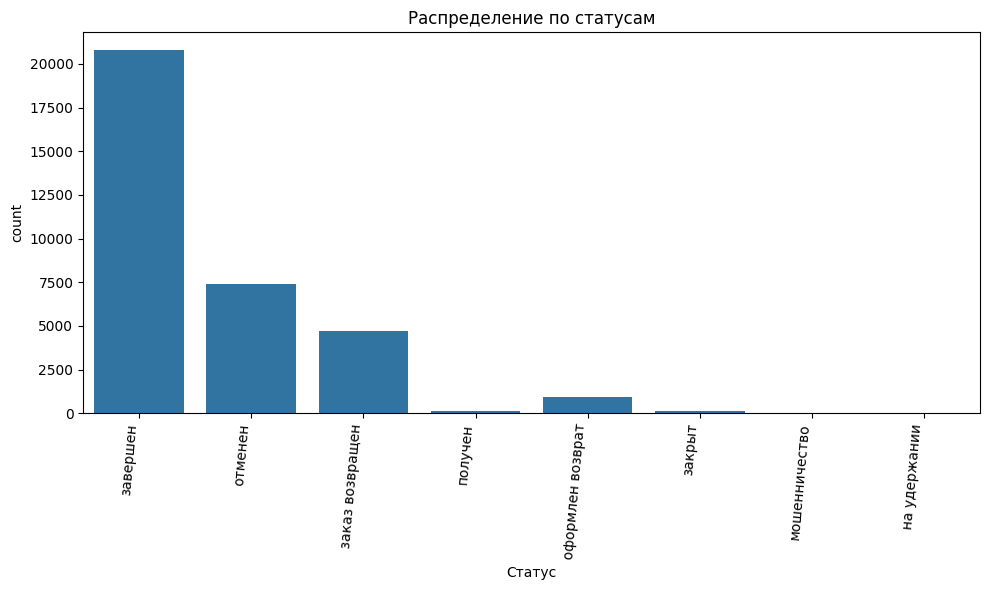

In [27]:
# График распределения по статусам
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Статус')
ax.set_title('Распределение по статусам')
ax.set_xticklabels(ax.get_xticklabels(), rotation=85, ha='right')
plt.tight_layout()
plt.show()

In [54]:
status_distribution

Статус
завершен            77810
отменен             41190
заказ возвращен     14732
получен              3059
оформлен возврат     2980
закрыт                213
мошенничество           7
на удержании            6
обмен                   4
Name: count, dtype: int64

# 5. Динамика продаж в виде таблицы и в виде графика

In [64]:
sales_dynamic = df.query('Статус in ("завершен", "получен")').groupby('Дата создания')['Итоговая сумма'].sum().reset_index()
sales_dynamic.head()

,Дата создания,Итоговая сумма
0,01.01.2022,412603
1,01.07.2021,150948
2,01.08.2021,503992
3,01.09.2021,736366
4,01.10.2021,1017509


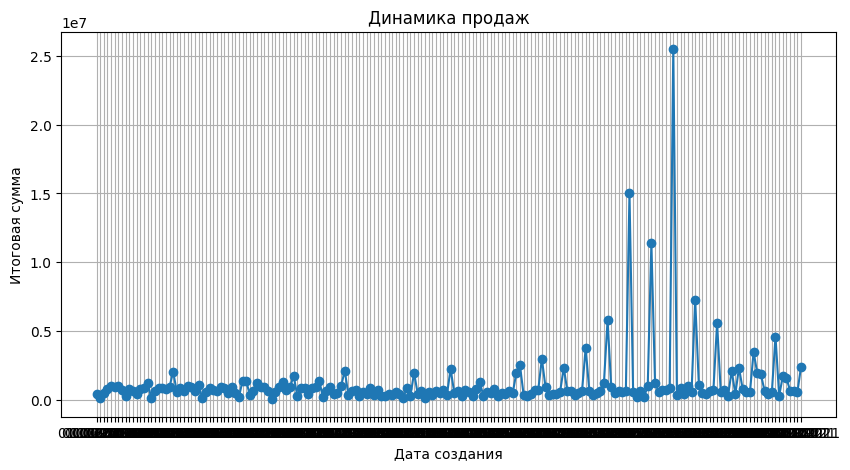

In [65]:
# График динамики продаж
plt.figure(figsize=(10, 5))
plt.plot(sales_dynamic['Дата создания'], sales_dynamic['Итоговая сумма'], marker='o')
plt.title('Динамика продаж')
plt.xlabel('Дата создания')
plt.ylabel('Итоговая сумма')
plt.grid(True)
plt.show()

In [66]:
# 5. Динамика продаж в виде таблицы и в виде графика -2 вариант
# Преобразуем 'Дата создания' в тип datetime
df['Дата создания'] = pd.to_datetime(df['Дата создания'], errors='coerce')
# Группируем данные по месяцам и суммируем 'Итоговую сумму'
sales_trend = df.query('Статус in ("завершен", "получен")').groupby(df['Дата создания'].dt.to_period('M')).agg({'Итоговая сумма': 'sum'}).reset_index()

In [67]:
# Преобразуем период обратно в метку времени
sales_trend['Дата создания'] = sales_trend['Дата создания'].dt.to_timestamp()
# Показываем первые несколько строк таблицы
sales_trend.head()

,Дата создания,Итоговая сумма
0,2021-01-01,4308541
1,2021-02-01,3708227
2,2021-03-01,4038927
3,2021-04-01,4569874
4,2021-05-01,3795739


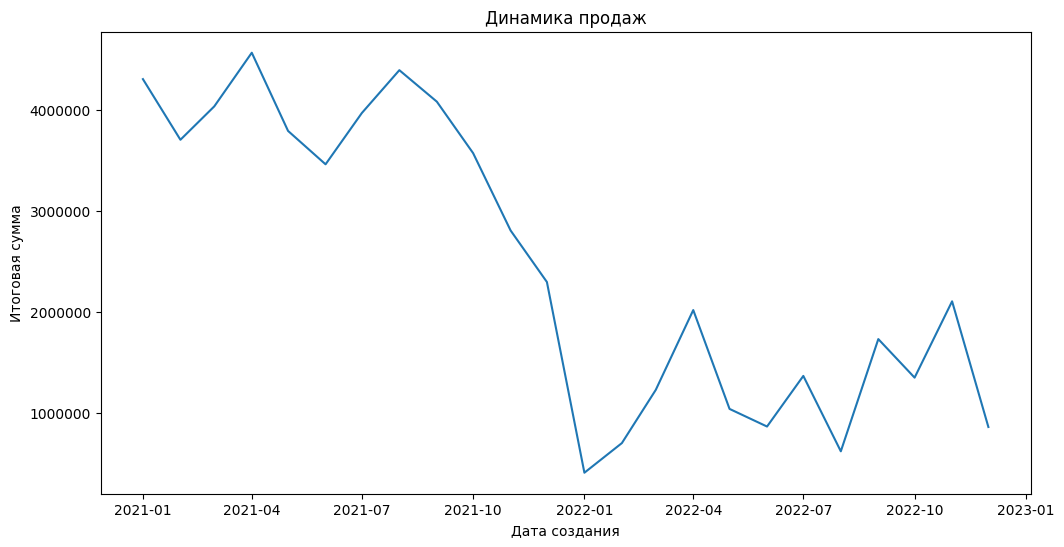

In [68]:
# График динамики продаж
from matplotlib.ticker import ScalarFormatter
# График динамики продаж
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trend, x='Дата создания', y='Итоговая сумма')
plt.title('Динамика продаж')
plt.xlabel('Дата создания')
plt.ylabel('Итоговая сумма')

# отключение нацчной анатации
# Настройка форматирования оси Y
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.get_major_formatter().set_useOffset(False)

plt.show()

# 6. Продажи по дням недели в виде графика

In [69]:
# 7. GMV по каждой категории
gmv_by_category = df.query('Статус in ("завершен", "получен")').groupby('Категория')['Итоговая сумма'].sum().reset_index()
#gmv_by_category = df.groupby('Категория').agg({'Итоговая сумма':'sum'}).reset_index()
gmv_by_category.head()

,Категория,Итоговая сумма
0,\N,17689281
1,Бытовая техника,30406974
2,Гипермаркет,5333855
3,Дети и младенцы,3759564
4,Дом и быт,8145177


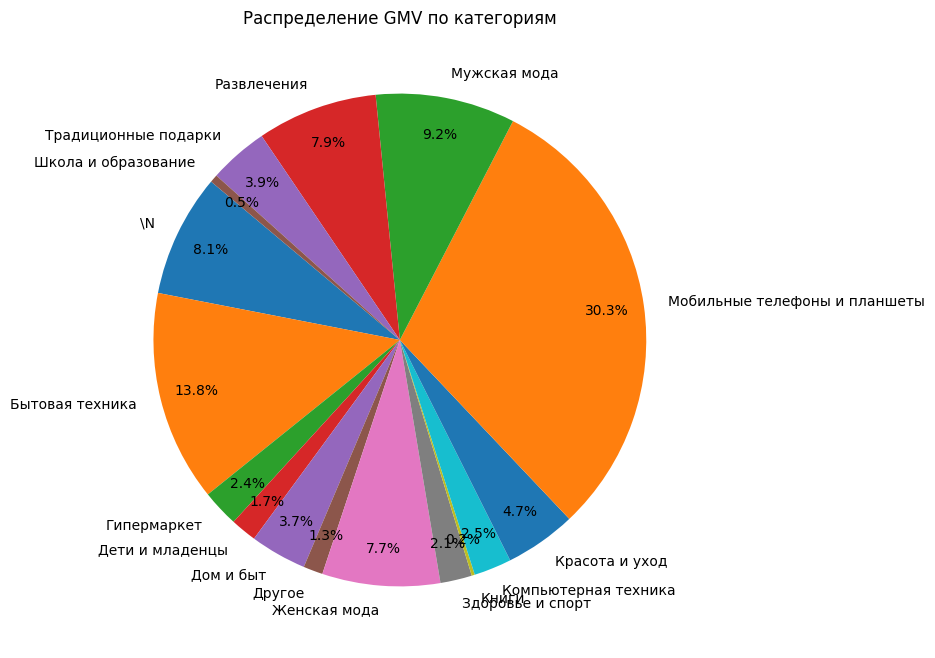

In [70]:
plt.figure(figsize=(8, 8))
plt.pie(gmv_by_category['Итоговая сумма'], labels=gmv_by_category['Категория'], autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.title('Распределение GMV по категориям')
plt.show()

# 8. Доля отмен в каждой категории

In [40]:
cancelled_orders = df[df['Статус'] == 'отменен']
cancelled_share_by_category = cancelled_orders['Категория'].value_counts() / df['Категория'].value_counts()
print(cancelled_share_by_category)

Категория
\N                               0.230425
Бытовая техника                  0.406429
Гипермаркет                      0.352657
Дети и младенцы                  0.152542
Дом и быт                        0.161716
Другое                           0.261494
Женская мода                     0.255802
Здоровье и спорт                 0.145682
Книги                            0.122727
Компьютерная техника             0.335308
Красота и уход                   0.068765
Мобильные телефоны и планшеты    0.336434
Мужская мода                     0.155751
Развлечения                      0.568558
Традиционные подарки             0.155176
Школа и образование              0.179959
Name: count, dtype: float64


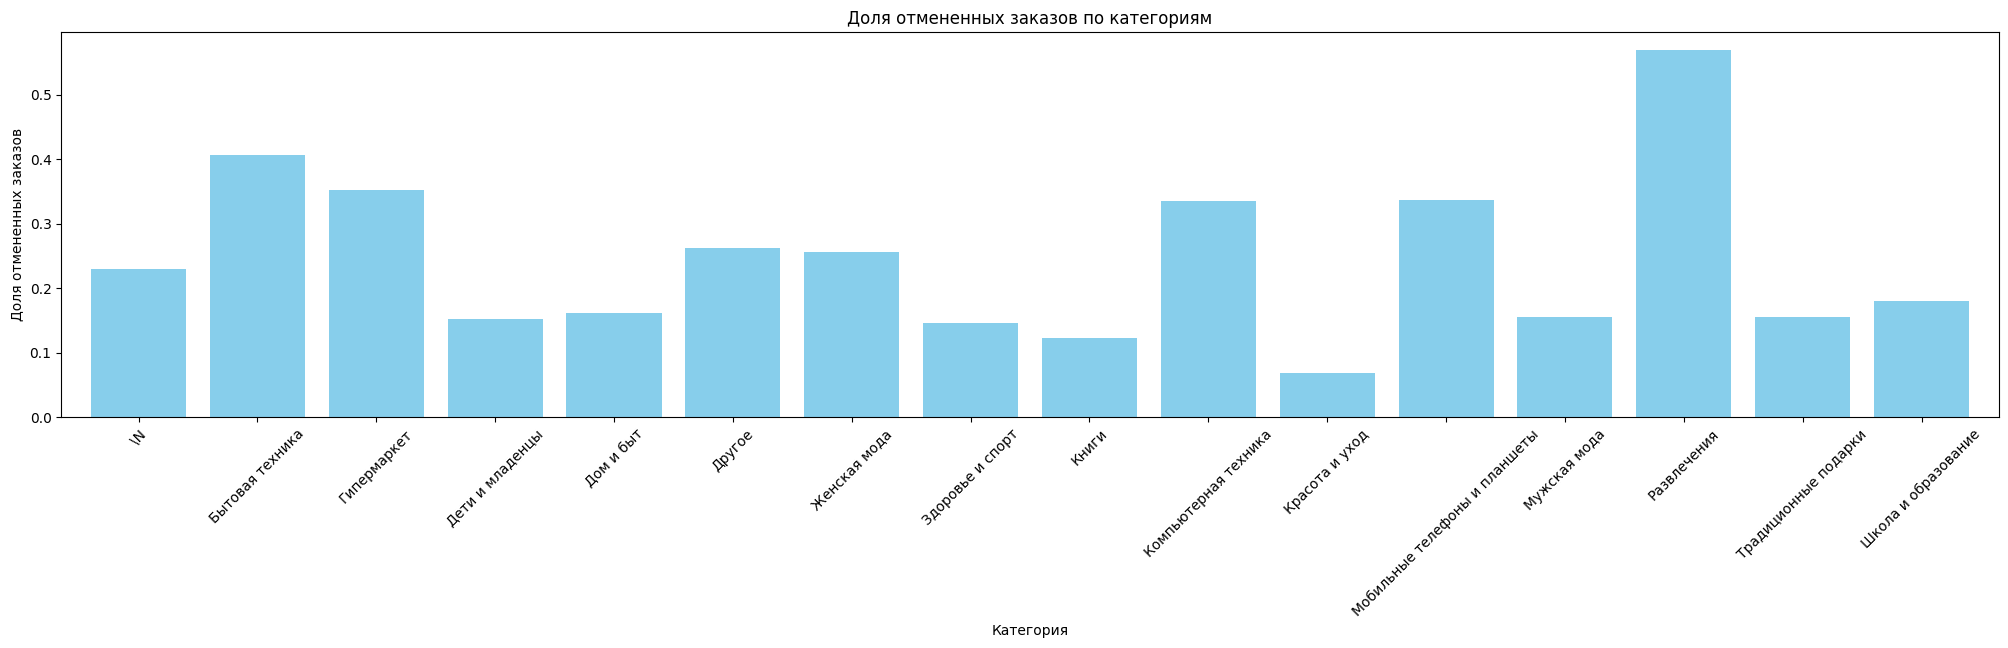

In [41]:
plt.figure(figsize=(25, 5))
cancelled_share_by_category.plot(kind='bar', color='skyblue', width=0.8)
plt.title('Доля отмененных заказов по категориям')
plt.xlabel('Категория')
plt.ylabel('Доля отмененных заказов')
plt.xticks(rotation=45)
plt.show()

# 9 на какие категории скидки

In [72]:
# Преобразуем колонку 'Сумма скидки' в числовой формат
df['Сумма скидки'] = pd.to_numeric(df['Сумма скидки'], errors='coerce')
# Фильтруем строки, где 'Сумма скидки' больше 0, и получаем уникальные категории
categories_with_discounts = df[df['Сумма скидки'] > 0]['Категория']
# Подсчитываем количество уникальных категорий
categories_count = categories_with_discounts.value_counts()

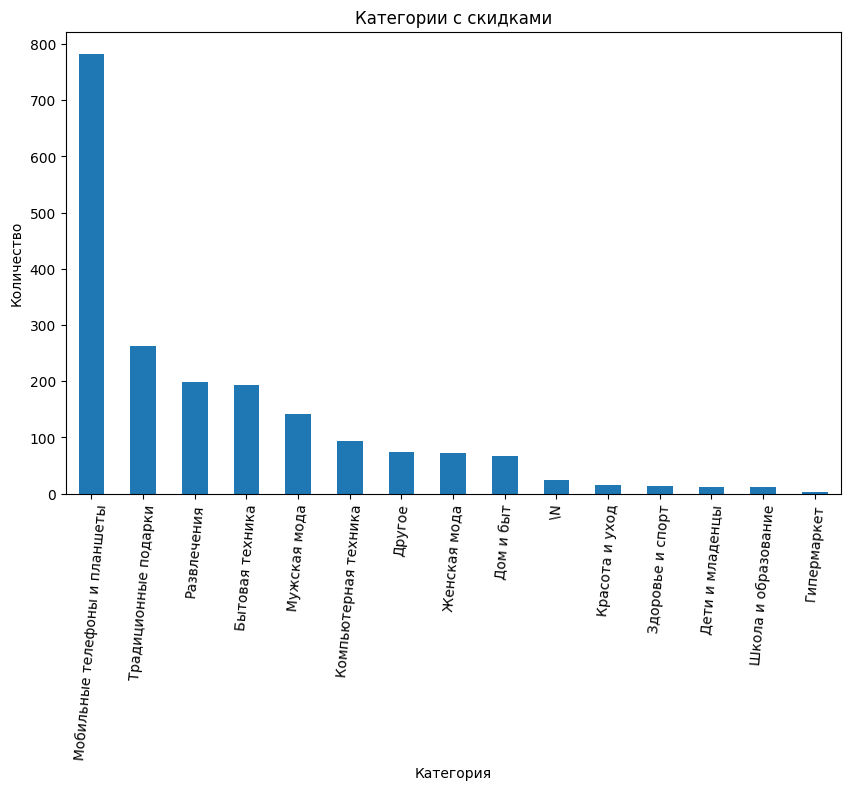

In [44]:
# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
categories_count.plot(kind='bar')
plt.title('Категории с скидками')
plt.xlabel('Категория')
plt.ylabel('Количество')
plt.xticks(rotation=85)  # Поворот меток на оси x для лучшей читаемости
plt.show()

#  10. Рейтинг самых продаваемых товаров

In [73]:
#преобразуем столбйы к нужным типам данных
df['Количество заказов'] = pd.to_numeric(df['Количество заказов'], errors='coerce')
df['Артикул товара'] = df['Артикул товара'].astype(str)
df['Категория'] = df['Категория'].astype(str)

top_products = df.query('Статус in ("завершен", "получен")').groupby(['Артикул товара', 'Категория'])['Количество заказов'].sum().reset_index()
top_products = top_products.sort_values(by='Количество заказов', ascending=False).reset_index(drop=True)
top_products.head()

,Артикул товара,Категория,Количество заказов
0,Al Muhafiz Sohan Halwa Almond,Традиционные подарки,1615
1,kcc_krone deal,Красота и уход,1335
2,RS_Plain Rusk,Традиционные подарки,1183
3,unilever_Deal-6,Гипермаркет,766
4,emart_00-7,Дом и быт,747
